# COVID USA ScratchPad

This uses a county level timeseries dataset provided by:  https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/ 

You can use curl to fetch the 2 files or download manually.

- curl https://static.usafacts.org/public/data/covid-19/covid_confirmed_usafacts.csv -o usa-confirmed.csv   
- curl https://static.usafacts.org/public/data/covid-19/covid_deaths_usafacts.csv -o usa-deaths.csv


## Loading and displaying USAFacts Regional data

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

dfd = pd.read_csv(StringIO(requests.get('https://static.usafacts.org/public/data/covid-19/covid_deaths_usafacts.csv').text))
dfc = pd.read_csv(StringIO(requests.get('https://static.usafacts.org/public/data/covid-19/covid_confirmed_usafacts.csv').text))
dfd.insert(0,'countyFIPS0',dfd[dfd.columns[0]])  # hack when there is a bogus bom ffef header
dfc.insert(0,'countyFIPS0',dfc[dfc.columns[0]])  # hack when there is a bogus bom ffef header
dfd = dfd.drop(columns=dfd.columns[1]).rename(columns={'countyFIPS0':'countyFIPS'})           
dfc = dfc.drop(columns=dfc.columns[1]).rename(columns={'countyFIPS0':'countyFIPS'})           
display('df* shapes (col,rows): ' + str(dfc.shape) + ' ' + str(dfd.shape))
display('latest file check',dfc.head(3).iloc[:,-1:], dfd.head(3))
        

'df* shapes (col,rows): (3196, 76) (3196, 76)'

'latest file check'

,4/2/2020
0,0.0
1,10.0
2,25.0


,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


## Select Counties with the highest Counts

In [151]:
# join first 4 cols + last 10 columns, filter on > 500 cases in latest date, sort by desc, # as of 3/27 now it is split into buroughs
filter = dfc['State']=='NY'
dfc_ST = dfc[filter]   # filter just NY rows
dfc_ST = dfc
dfc_ST = pd.concat([dfc_ST.iloc[:,1:4], dfc_ST.iloc[:,-7:]], axis=1) 
dfc_ST = dfc_ST[dfc_ST[dfc_ST.columns[-1]] > 1000].sort_values(by=[dfc_ST.columns[-1]], ascending=False)
display('X counties w/ > 1000 cases', dfc_ST)


'X counties w/ > 1000 cases'

,County Name,State,stateFIPS,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020
1903,Queens County,NY,36,8214,9831,10737,12756,13869,15217.0,16819.0
1886,Kings County,NY,36,6750,8129,8887,10171,11160,12274.0,13290.0
1922,Westchester County,NY,36,7187,7875,8519,9329,9967,10683.0,11567.0
1892,Nassau County,NY,36,4657,5537,6445,7344,8544,9554.0,10587.0
1865,Bronx County,NY,36,4655,5752,6250,6925,7814,8607.0,9343.0
1914,Suffolk County,NY,36,3386,4138,5023,5791,6713,7605.0,8746.0
1893,New York County,NY,36,4478,5237,5582,6060,6539,7022.0,7398.0
625,Cook County,IL,17,2239,2613,3445,3727,4496,5152.0,5575.0
1336,Wayne County,MI,26,1810,2316,2704,3195,3735,4470.0,5069.0
1805,Statewide Unallocated,NJ,34,1984,2478,3020,3847,3686,4512.0,4866.0


# Population Data

In [152]:
# https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html#par_textimage_70769902

df_pop = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv', encoding='latin')  
df_pop['countyFIPS'] = df_pop['STATE'].astype(str) + df_pop['COUNTY'].astype(str).apply(lambda x: x.zfill(3))
df_pop['countyFIPS'] = pd.to_numeric(df_pop['countyFIPS'])
# display(df_pop)
# display(dfc)

dfc_merged_pop = pd.merge(right=dfc, left=df_pop[['countyFIPS','CENSUS2010POP','CTYNAME']], on='countyFIPS', how='right')
dfc_merged_pop = dfc_merged_pop.fillna(0)
dfc_merged_pop['Latest Case Count'] = dfc_merged_pop[dfc_merged_pop.columns[-1]] 

display(dfc_merged_pop.head())


# baldwin = 1003
# ST = 1 or 01, county = 3 or 003


,countyFIPS,CENSUS2010POP,CTYNAME,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,...,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,Latest Case Count
0,1001,54571.0,Autauga County,Autauga County,AL,1,0,0,0,0,...,4,6,6,6,6,7,7,10.0,10.0,10.0
1,1003,182265.0,Baldwin County,Baldwin County,AL,1,0,0,0,0,...,4,5,5,10,15,18,19,23.0,25.0,25.0
2,1005,27457.0,Barbour County,Barbour County,AL,1,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
3,1007,22915.0,Bibb County,Bibb County,AL,1,0,0,0,0,...,0,0,0,0,0,2,3,3.0,4.0,4.0
4,1009,57322.0,Blount County,Blount County,AL,1,0,0,0,0,...,1,2,5,5,5,5,5,5.0,6.0,6.0


In [153]:
# check how many unallocateds remove them all

#display(dfc_merged_pop[dfc_merged_pop['County Name'] == 'Statewide Unallocated'])
dfc_p2 = dfc_merged_pop[dfc_merged_pop['County Name'] != 'Statewide Unallocated']
dfc_p2 = dfc_p2.drop([186,3194,3195])
dfc_p2['CityState'] = dfc_p2['County Name'] +', '+ dfc_p2['State']
dfc_p2 = dfc_p2[['CityState','Latest Case Count','CENSUS2010POP','countyFIPS','CTYNAME']]
dfc_p2['% of Pop'] = (dfc_p2['Latest Case Count'] / dfc_p2['CENSUS2010POP']).mul(100).round(2).astype(str)+'%'
dfc_p2 = dfc_p2.replace([np.inf, -np.inf], 0).fillna(0)

display(dfc_p2.head())
display(dfc_p2.sort_values(by=['% of Pop'], ascending=False).head())
display(dfc_p2.sort_values(by=['% of Pop'], ascending=False).head(15)[['CityState','Latest Case Count','CENSUS2010POP','% of Pop']])


,CityState,Latest Case Count,CENSUS2010POP,countyFIPS,CTYNAME,% of Pop
0,"Autauga County, AL",10.0,54571.0,1001,Autauga County,0.02%
1,"Baldwin County, AL",25.0,182265.0,1003,Baldwin County,0.01%
2,"Barbour County, AL",0.0,27457.0,1005,Barbour County,0.0%
3,"Bibb County, AL",4.0,22915.0,1007,Bibb County,0.02%
4,"Blount County, AL",6.0,57322.0,1009,Blount County,0.01%


,CityState,Latest Case Count,CENSUS2010POP,countyFIPS,CTYNAME,% of Pop
558,"Blaine County, ID",351.0,21376.0,16013,Blaine County,1.64%
1888,"Westchester County, NY",11567.0,949113.0,36119,Westchester County,1.22%
1872,"Rockland County, NY",3751.0,311687.0,36087,Rockland County,1.2%
1149,"Orleans Parish, LA",3148.0,343829.0,22071,Orleans Parish,0.92%
1858,"Nassau County, NY",10587.0,1339532.0,36059,Nassau County,0.79%


,CityState,Latest Case Count,CENSUS2010POP,% of Pop
558,"Blaine County, ID",351.0,21376.0,1.64%
1888,"Westchester County, NY",11567.0,949113.0,1.22%
1872,"Rockland County, NY",3751.0,311687.0,1.2%
1149,"Orleans Parish, LA",3148.0,343829.0,0.92%
1858,"Nassau County, NY",10587.0,1339532.0,0.79%
1869,"Queens County, NY",16819.0,2230722.0,0.75%
1831,"Bronx County, NY",9343.0,1385108.0,0.67%
1871,"Richmond County, NY",2822.0,468730.0,0.6%
264,"Eagle County, CO",314.0,52197.0,0.6%
1161,"St. John the Baptist Parish, LA",274.0,45924.0,0.6%


# Unemployment data WIP

In [155]:
# https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html#par_textimage_70769902
# https://www.bls.gov/web/metro/laucntycur14.txt  <- only into Jan'2020

# --------------------------------------------------------------------------------------------------------------------------------------
#                  |  FIPS Codes  |                                          |           |  Civilian  |            |     Unemployed
#   LAUS Area Code |--------------|                Area Title                |   Period  |    Labor   |  Employed  |--------------------
#                  | State| County|                                          |           |    Force   |            |   Level  |   Rate
# --------------------------------------------------------------------------------------------------------------------------------------
#  CN0100100000000 |  01  |  001  | Autauga County, AL                       |   Dec-18  |     25,811 |     24,948 |      863 |     3.3


df_pop = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv', encoding='latin')  
df_pop['countyFIPS'] = df_pop['STATE'].astype(str) + df_pop['COUNTY'].astype(str).apply(lambda x: x.zfill(3))
df_pop['countyFIPS'] = pd.to_numeric(df_pop['countyFIPS'])
# display(df_pop)
# display(dfc)

dfc_merged_pop = pd.merge(right=dfc, left=df_pop[['countyFIPS','CENSUS2010POP','CTYNAME']], on='countyFIPS', how='right')
dfc_merged_pop = dfc_merged_pop.fillna(0)
dfc_merged_pop['Latest Case Count'] = dfc_merged_pop[dfc_merged_pop.columns[-1]] 

display(dfc_merged_pop.head())


# baldwin = 1003
# ST = 1 or 01, county = 3 or 003


,countyFIPS,CENSUS2010POP,CTYNAME,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,...,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,Latest Case Count
0,1001,54571.0,Autauga County,Autauga County,AL,1,0,0,0,0,...,4,6,6,6,6,7,7,10.0,10.0,10.0
1,1003,182265.0,Baldwin County,Baldwin County,AL,1,0,0,0,0,...,4,5,5,10,15,18,19,23.0,25.0,25.0
2,1005,27457.0,Barbour County,Barbour County,AL,1,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
3,1007,22915.0,Bibb County,Bibb County,AL,1,0,0,0,0,...,0,0,0,0,0,2,3,3.0,4.0,4.0
4,1009,57322.0,Blount County,Blount County,AL,1,0,0,0,0,...,1,2,5,5,5,5,5,5.0,6.0,6.0


## Plotting growth rates by  Counties

Pandas has builtin matploblit integration (DataFrame.plot*) which renders natively in notebooks.  Very slick!

,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020
CountySt,,,,,
"Queens County, NY",10737,12756,13869,15217.0,16819.0
"Kings County, NY",8887,10171,11160,12274.0,13290.0
"Westchester County, NY",8519,9329,9967,10683.0,11567.0
"Nassau County, NY",6445,7344,8544,9554.0,10587.0
"Bronx County, NY",6250,6925,7814,8607.0,9343.0
"Suffolk County, NY",5023,5791,6713,7605.0,8746.0
"New York County, NY",5582,6060,6539,7022.0,7398.0
"Cook County, IL",3445,3727,4496,5152.0,5575.0
"Wayne County, MI",2704,3195,3735,4470.0,5069.0


,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020
CountySt,,,,,
"Queens County, NY",906.0,2019.0,1113.0,NaN,1602.0
"Suffolk County, NY",885.0,768.0,922.0,NaN,1141.0
"Nassau County, NY",908.0,899.0,1200.0,NaN,1033.0
"Kings County, NY",758.0,1284.0,989.0,NaN,1016.0
"Westchester County, NY",644.0,810.0,638.0,NaN,884.0
"Orleans Parish, LA",52.0,130.0,354.0,NaN,878.0
"Jefferson Parish, LA",17.0,77.0,355.0,NaN,745.0
"Bronx County, NY",498.0,675.0,889.0,NaN,736.0
"Miami-Dade County, FL",351.0,229.0,422.0,NaN,684.0


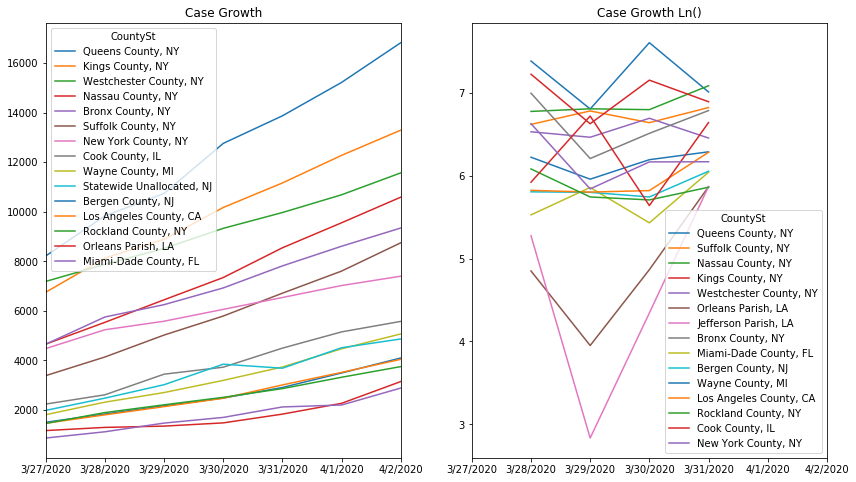

In [148]:
import numpy as np
fig, axs = plt.subplots(1,2)  # 1 x 2 side by side
dfc_ST2 = dfc_ST.copy()
dfc_ST2.insert(0,'CountySt', dfc_ST['County Name'] + ', ' +dfc_ST['State'])

dfc_ST2 = dfc_ST2.drop(columns=['State','stateFIPS']).groupby(['CountySt']).sum().sort_values(by=[dfc_ST2.columns[-1]], ascending=False)
dfc_ST_diff = dfc_ST2.diff(axis=1).sort_values(by=[dfc_ST2.columns[-1]], ascending=False)
display(dfc_ST2.head(15).iloc[:,-5:])
display(dfc_ST_diff.head(15).iloc[:,-5:])

dfc_ST2.head(15).transpose().head(15).plot(figsize=(14,8),title='Case Growth',ax=axs[0])
dfc_ST_diff.head(15).transpose().head(15).apply(np.log).plot(figsize=(14,8),title='Case Growth Ln()',ax=axs[1])


'top cases ct - DE,CA,FL,TX,NC,AL'

,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020
CountySt,,,,,
"Los Angeles County, CA",2136,2474,3011,3518.0,4045.0
"Miami-Dade County, FL",1472,1701,2123,2202.0,2886.0
"Broward County, FL",1012,1137,1219,1348.0,1481.0
"Santa Clara County, CA",646,848,890,956.0,1019.0


'case chg'

,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020
CountySt,,,,,
"Miami-Dade County, FL",351.0,229.0,422.0,NaN,684.0
"Los Angeles County, CA",332.0,338.0,537.0,NaN,527.0
"Broward County, FL",192.0,125.0,82.0,NaN,133.0
"Santa Clara County, CA",55.0,202.0,42.0,NaN,63.0


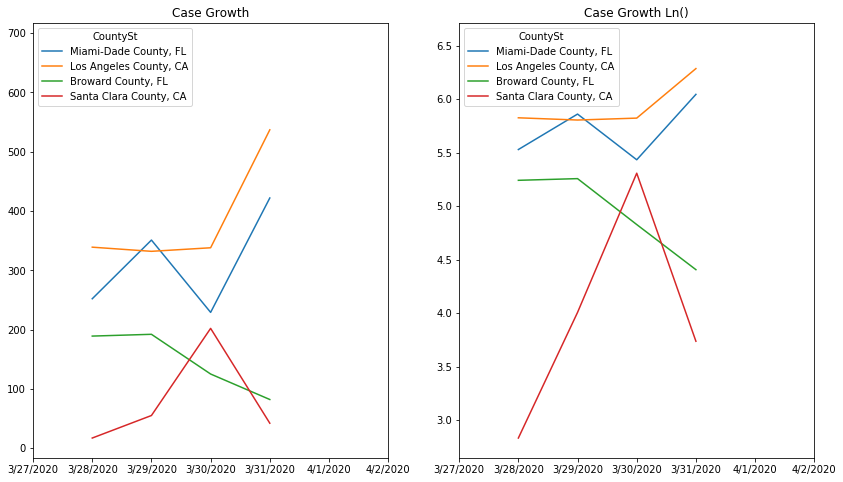

In [149]:
#custom county analysis 
fig, axs = plt.subplots(1,2)  # 1 x 2 side by side

dfc_ST2 = dfc_ST.copy()
dfc_ST2.insert(0,'CountySt',dfc_ST['County Name'] + ', ' +dfc_ST['State'])
dfc_ST2 = dfc_ST2[dfc_ST2['State'].isin(['DE','CA','FL','TX','NC','AL'])]
dfc_ST2 = dfc_ST2.drop(columns=['State','stateFIPS']).groupby(['CountySt']).sum().sort_values(by=[dfc_ST2.columns[-1]], ascending=False).head(20)
dfc_ST_diff = dfc_ST2.groupby(['CountySt']).sum().diff(axis=1).sort_values(by=[dfc_ST2.columns[-1]], ascending=False).head(20)

display('top cases ct - DE,CA,FL,TX,NC,AL',dfc_ST2.head(30).iloc[:,-5:])
display('case chg',dfc_ST_diff.head(30).iloc[:,-5:])

dfc_ST_diff.transpose().plot(figsize=(14,8),title='Case Growth',ax=axs[0])
dfc_ST_diff.transpose().apply(np.log).plot(figsize=(14,8),title='Case Growth Ln()',ax=axs[1])


## Plotting growth rates by State

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020
107,4013,Maricopa County,AZ,4,0,0,0,0,1,1,...,199,251,299,399,454,545,690,788,871.0,961.0
211,6037,Los Angeles County,CA,6,0,0,0,0,1,1,...,662,799,1216,1465,1804,2136,2474,3011,3518.0,4045.0
222,6059,Orange County,CA,6,0,0,0,0,1,1,...,152,187,256,321,403,431,464,502,606.0,656.0
229,6073,San Diego County,CA,6,0,0,0,0,0,0,...,242,297,341,417,488,519,603,734,849.0,966.0
235,6085,Santa Clara County,CA,6,0,0,0,0,0,0,...,375,459,542,574,591,646,848,890,956.0,1019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,48201,Harris County,TX,48,0,0,0,0,0,0,...,79,119,185,203,229,445,526,563,680.0,847.0
3002,0,Statewide Unallocated,WA,53,0,0,0,0,0,0,...,65,0,69,45,160,387,387,387,672.0,920.0
3019,53033,King County,WA,53,1,1,1,1,1,1,...,1277,1359,1577,1828,2077,2161,2330,2330,2496.0,2656.0
3033,53061,Snohomish County,WA,53,0,0,0,0,0,0,...,614,634,778,913,912,1068,1178,1286,1372.0,1444.0


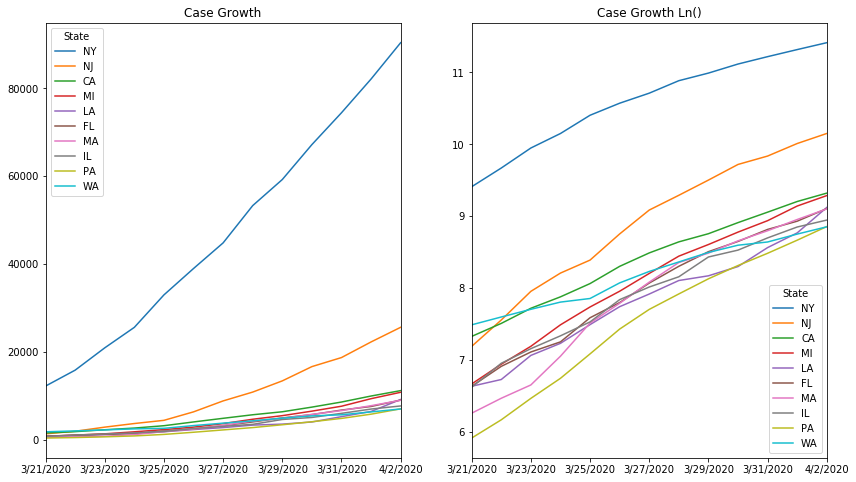

In [156]:
fig, axs = plt.subplots(1,2)

dfc_sum = dfc[dfc[dfc.columns[-1]] > 500]

dfc_sum = dfc.groupby(['State']).sum().loc[:, dfc.columns[-13:]].sort_values(by=[dfc.columns[-1]], ascending=False).head(10)

dfc_sum.transpose().plot(figsize=(14,8),title='Case Growth',ax=axs[0])
dfc_sum.transpose().apply(np.log).plot(figsize=(14,8),title='Case Growth Ln()',ax=axs[1])


## Daily Change rates and Plotting

In [ ]:
# show Day over day change rates, look in detail at last 7 days

df_sum_7 = dfc_sum.transpose().tail(7).transpose()
dfc_dod = df_sum_7.pct_change(axis=1).fillna(0).sort_values([df_sum_7.columns[-1]], ascending=False).head(10)
display(dfc_dod.head())
dfc_dod.transpose().mul(100).plot(figsize=(14,8),title='Day over day %change rates')


I'm not sure if this tells us anything -- rate of change is 10-50% day over day..  we can try taking a rolling average

In [ ]:
display(df_sum_7.head())
dfc_dod = df_sum_7.rolling(2,axis=1,center=False).mean().round()
display(dfc_dod.head())
dfc_dod = dfc_dod.pct_change(axis=1).fillna(0).sort_values([dfc_dod.columns[-1]], ascending=False)
display(dfc_dod.head())
dfc_dod[dfc_dod.columns[-4:]].head(10).transpose().mul(100).plot(figsize=(14,8),title='Day over day %change 2-day avg window')


Not much different taking a 2-day rolling average - 20-50% increase is the recent range

# Comparing vs S&P 500 datasets -- available from Yahoooo

Yahoo data is easy to get via https://finance.yahoo.com - or use this direct link:  
-  https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1581897600&period2=1609372800&interval=1d&events=history  

Note this is hardcoded to Feb 18 to Present (currently about 35 days)

In [ ]:
dfc_st = dfc.copy()
dfc_st = dfc_st.drop(columns=['stateFIPS','countyFIPS','County Name']).groupby(['State']).sum().sort_values(dfc_st.columns[-1], ascending=False)
dfc_st = dfc_st.transpose().tail(40)  # last 40 days ?
dfc_st.index = pd.to_datetime(dfc_st.index) 

sp_df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1581897600&period2=1609372800&interval=1d&events=history')
sp_df = sp_df.set_index('Date')

# create a single table w/ close, states, totalcases
merged_df = pd.merge(left=dfc_st, right=sp_df, left_index=True, right_index=True, how='left')
merged_df = merged_df.fillna(method='backfill')  # fill weekends blanks
merged_df['USA'] = merged_df[merged_df.columns[0:50]].sum(axis=1)

merged_df.tail()

In [ ]:
#plotting overlays fun 

fig,ax1 = plt.subplots(figsize=(14, 8)) 
data = merged_df[['Low','Close','Close','High']]

ax1.set_ylabel('S&P Stock Index Level')  # we already handled the x-label with ax1
ax1.set(ylim=[1500, 3500]) 
ax1.bar(merged_df.index, merged_df['Close'], color='xkcd:silver')

ax2 = ax1.twinx()
ax2.set_ylabel('COVID-19 Case Count by State (Ln)')  # we already handled the x-label with ax1
lines = ax2.plot(merged_df.index, merged_df[merged_df.columns[0:50]])
for c,line in enumerate(lines[0:20]):
    line.set_label(merged_df.columns[c])
ax2.legend()

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.spines["right"].set_color('xkcd:red')
ax3.set_ylabel('National Count ... ', color='xkcd:red')  # we already handled the x-label with ax1
ax3.plot(merged_df.index, merged_df['USA'], color='xkcd:red', linestyle=':')
plt.title('S&P vs COVID (US State and National)')
plt.show()

# Using PyPlot GeoJSON and ChoroPleth maps

https://plot.ly/python/choropleth-maps/

Install
- pyplot
- pyplot-orca


In [ ]:
from urllib.request import urlopen
import plotly.figure_factory as ff

import json

import pandas as pd
df = dfc[['countyFIPS','County Name','State']].copy()
df['count'] = dfc[dfc.columns[-21]]  # n days ago
df['County, ST'] = df['County Name']+', '+df['State']
display(df.shape)

# make FIPS 5 char to match geojson data
df['countyFIPSstr'] = df['countyFIPS'].apply(lambda x: str(x) if x > 9999 else '0'+str(x)) 
df['countLog'] = df['count'].apply(lambda x: round(np.log(x),1) if x != 0 else 0)
df['label'] = df['County, ST'] + ': ' + df['count'].astype(str)

colorscale = ['rgb(245,245,245)', 'rgb(254,224,210)', 'rgb(252,187,161)', 'rgb(252,146,114)', 'rgb(251,106,74)',
 'rgb(239,59,44)', 'rgb(203,24,29)', 'rgb(165,15,21)', 'rgb(103,0,13)']

endpts = list(np.linspace(1, 12, len(colorscale) - 1))

fips = df['countyFIPSstr'].tolist()
values = df['countLog'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['usa'],
     binning_endpoints=endpts, 
    colorscale=colorscale,
    show_state_data=False,
    show_hover=False,
    asp = 2.9,
    title_text = 'COVID Cases 3wks days ago',
    legend_title = '#Cases (LN)'
)
fig.update_layout(autosize=False,width=600, height=310)
fig.layout.template = None
fig.show()

## -- t-1.5

df['count'] = dfc[dfc.columns[-10]]  # n days ago
df['countLog'] = df['count'].apply(lambda x: round(np.log(x),1) if x != 0 else 0)
values = df['countLog'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['usa'],
     binning_endpoints=endpts, 
    colorscale=colorscale,
    show_state_data=False,
    show_hover=False,
    asp = 2.9,
    title_text = 'COVID Cases 10 days ago',
    legend_title = '#Cases (LN)'
)
fig.update_layout(autosize=False,width=600,height=320,)
fig.layout.template = None
fig.show()

## -- now
df['count'] = dfc[dfc.columns[-1]]  # n days ago
df['countLog'] = df['count'].apply(lambda x: round(np.log(x),1) if x != 0 else 0)
values = df['countLog'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['usa'],
     binning_endpoints=endpts, 
    colorscale=colorscale,
    show_state_data=False,
    show_hover=False,
    asp = 2.9,
    title_text = 'COVID Cases Today: '+dfc.columns[-1],
    legend_title = '#Cases (LN)'
)
fig.update_layout(autosize=False,width=600,height=330,)
fig.layout.template = None
fig.show()


In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = dfc[['countyFIPS','County Name','State']].copy()
df['count'] = dfc[dfc.columns[-21]]  # n days ago
df['County, ST'] = df['County Name']+', '+df['State']
display(df.shape)

# make FIPS 5 char to match geojson data
df['countyFIPSstr'] = df['countyFIPS'].apply(lambda x: str(x) if x > 9999 else '0'+str(x)) 
df['countLog'] = df['count'].apply(lambda x: np.log(x) if x != 0 else 0)
df['label'] = df['County, ST'] + ': ' + df['count'].astype(str)
df.head()

import plotly.express as px
fig = px.choropleth(df, geojson=counties, 
                           locations='countyFIPSstr', 
                           color='countLog',
                           color_continuous_scale="OrRd",
                           range_color=(0,10),
                           scope="usa",
                           hover_name='label',
                           labels={'covis':'covis count'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
fig.show("svg")

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = dfc[['countyFIPS','County Name','State']].copy()
df['count'] = dfc[dfc.columns[-1]]
df['County, ST'] = df['County Name']+', '+df['State']
display(df.shape)

# make FIPS 5 char to match geojson data
df['countyFIPSstr'] = df['countyFIPS'].apply(lambda x: str(x) if x > 9999 else '0'+str(x)) 
df['countLog'] = df['count'].apply(lambda x: np.log(x) if x != 0 else 0)
df['label'] = df['County, ST'] + ': ' + df['count'].astype(str)
df.head()


In [ ]:
import plotly.express as px
fig = px.choropleth(df, geojson=counties, 
                           locations='countyFIPSstr', 
                           color='countLog',
                           color_continuous_scale="OrRd",
                           range_color=(0,10),
                           scope="usa",
                           hover_name='label',
                           labels={'covis':'covis count'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
# for github and nbviewer rendering
fig.show("svg")